Dataset Info:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose        

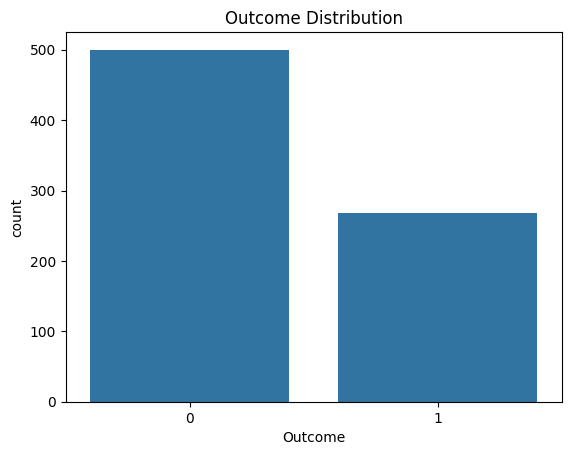

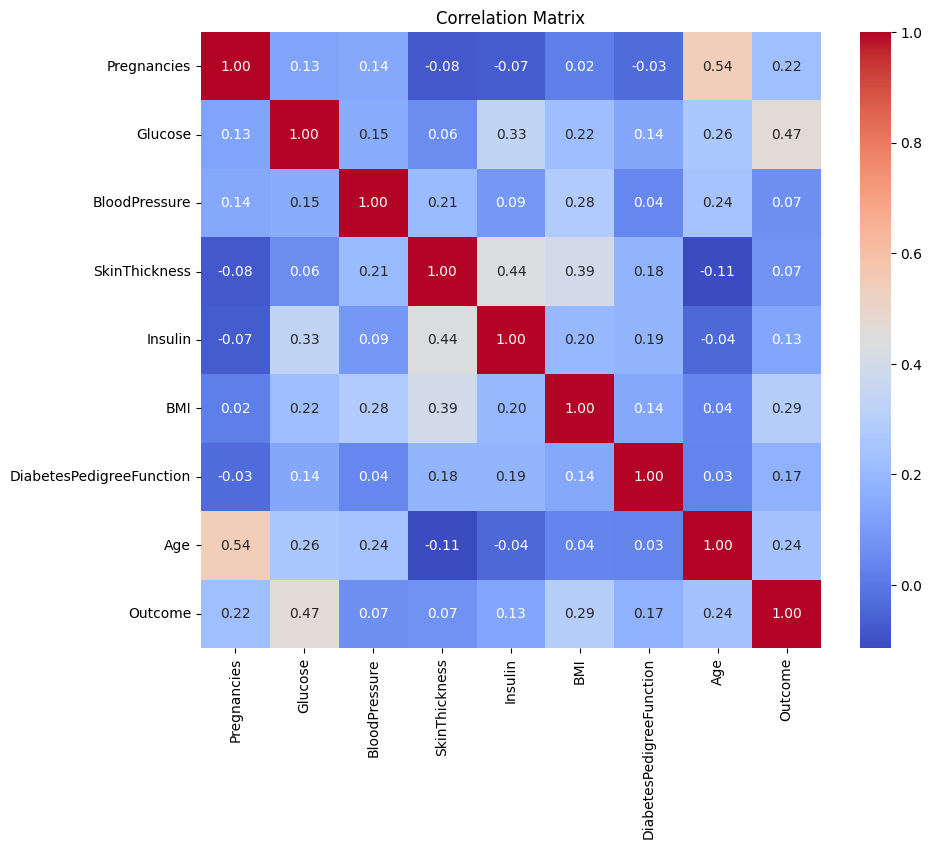


Train and Test shapes: (614, 8) (154, 8)


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
diabetes_dataset = pd.read_csv('/Users/astha/Desktop/Diabetes Prediction/Datasets/Dataset1/diabetes.csv')

# Basic Overview
print("Dataset Info:")
print(diabetes_dataset.head())
print(diabetes_dataset.info())
print("\nSummary Statistics:")
print(diabetes_dataset.describe())

# Check for missing values
print("\nMissing Values:")
print(diabetes_dataset.isnull().sum())

# Outcome distribution
sns.countplot(data=diabetes_dataset, x='Outcome')
plt.title('Outcome Distribution')
plt.show()

# Correlation Analysis
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_dataset.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Splitting Features and Labels
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

# Standardizing Features
scaler = MinMaxScaler()  # Using MinMaxScaler for improved scaling
X = scaler.fit_transform(X)

# Splitting the Dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print("\nTrain and Test shapes:", X_train.shape, X_test.shape)

In [6]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=4, random_state=2)
rf.fit(X_train, Y_train)

# Making predictions
ypred_train = rf.predict(X_train)  
ypred_test = rf.predict(X_test)   

# Calculating Accuracy for Training and Testing
accuracy_train = accuracy_score(Y_train, ypred_train)
accuracy_test = accuracy_score(Y_test, ypred_test)

# Printing Accuracy for Training and Testing
print(f"Training Accuracy: {accuracy_train * 100:.2f}%")
print(f"Testing Accuracy: {accuracy_test * 100:.2f}%")


Training Accuracy: 98.70%
Testing Accuracy: 73.38%
